# 歷史考據學家 想知道鐵達尼號的生存者，男女在各年齡層區間的人數

In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#圖表中文化
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] 
plt.rcParams['axes.unicode_minus'] = False

## 參考載入檔案
[老師介紹的Python教學區](https://github.com/justmarkham/pandas-videos)

In [22]:
df=pd.read_csv('http://bit.ly/kaggletrain')

## 查看前幾筆

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 先找出生存者

In [24]:
df1=df[df.Survived==1]

## 依性別做分類

In [25]:
df_sex=df1.groupby(['Sex'])

## 計算男女各有多少人

In [26]:
df_sex.sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,100120,233,447,5683.00,120,120,12101.6876
male,51854,109,220,2536.67,42,39,4449.5418


## 將分類好的男、女資料 分別取出

In [27]:
s_malelist=df_sex.get_group("male")
s_femalelist=df_sex.get_group("female")

## 列出男姓資料，可知有109人

In [28]:
s_malelist

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


## 列出女生資料，可知有233人

In [29]:
s_femalelist

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [30]:
type(s_malelist)

pandas.core.frame.DataFrame

## 列出男性，年齡不為NaN的資料

In [31]:
s_malelist[s_malelist["Age"].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.00,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S


## 列出女性，年齡不為NaN的資料

In [32]:
s_femalelist[s_femalelist["Age"].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [33]:
s_femalelist["Age"].min()

0.75

## 根據 男性年齡 做出區間分類, 並計算各區間人數

In [55]:
male_age_interval=s_malelist.groupby(pd.cut(s_malelist["Age"],np.arange(0,101,10.),right='True')).size()

In [56]:
type(male_age_interval)

pandas.core.series.Series

## 根據 女性年齡 做出區間分類, 並計算各區間人數

In [57]:
female_age_interval=s_femalelist.groupby(pd.cut(s_femalelist["Age"],np.arange(0,101,10.),right='True')).size()

In [58]:
type(female_age_interval)

pandas.core.series.Series

## 把series再轉成DataFrame

In [75]:
man_plotdata=pd.DataFrame({'Male':male_age_interval.values,
                           'Female':female_age_interval.values},index=male_age_interval.index)

In [76]:
man_plotdata

,Male,Female
Age,,
"(0.0, 10.0]",19,19
"(10.0, 20.0]",10,34
"(20.0, 30.0]",23,61
"(30.0, 40.0]",23,46
"(40.0, 50.0]",12,21
"(50.0, 60.0]",4,13
"(60.0, 70.0]",1,3
"(70.0, 80.0]",1,0
"(80.0, 90.0]",0,0


## 用DataFrame的畫圖功能做出示意圖

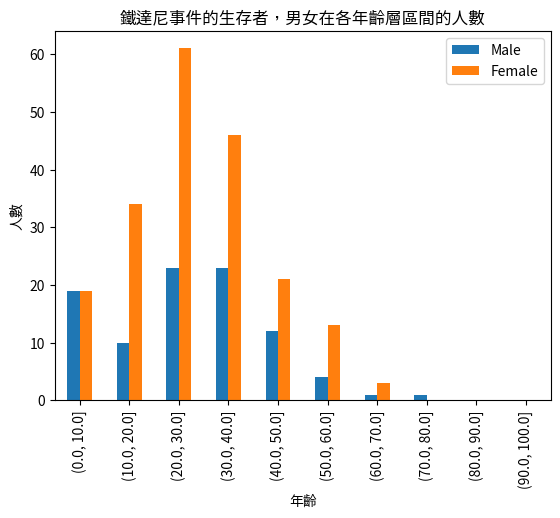

In [77]:
man_plotdata.plot(kind='bar')
plt.title("鐵達尼事件的生存者，男女在各年齡層區間的人數")
plt.xlabel("年齡")
plt.ylabel("人數")
plt.show()